In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

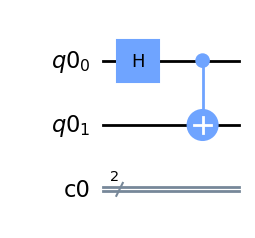

In [3]:
circuit.h(0)
circuit.cx(0, 1)
circuit.draw('mpl')

In [4]:
circuit.measure(qr, cr)

In [5]:
print(circuit)

      ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1 


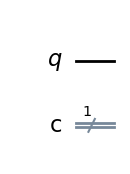

In [6]:
circ2 = QuantumCircuit(1, 1)
circ2.draw('mpl')

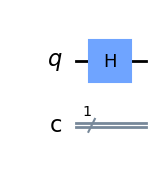

In [7]:
circ2.h(0)
circ2.draw('mpl')

In [9]:
circ2.measure(0, 0)
print(circ2)

     ┌───┐┌─┐┌─┐
  q: ┤ H ├┤M├┤M├
     └───┘└╥┘└╥┘
c: 1/══════╩══╩═
           0  0 


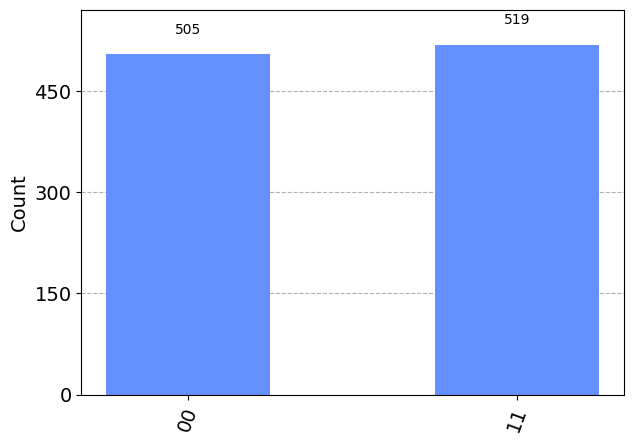

In [11]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(circuit,simulator).result().get_counts()
plot_histogram(results)

In [14]:
res = execute(circ2, simulator).result().get_counts()
print(res)

{'0': 512, '1': 512}


In [19]:
key = # paste this key from mail 
IBMQ.save_account(key, overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-06-06 14:49:31,026: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_quito')

In [23]:
mapped_circuit = transpile(circuit, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

In [24]:
job = backend.run(qobj)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_11940\953110630.py:1: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


In [25]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [26]:
job.job_id()

'chvfm6u561q7nmcoph5g'

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
job_monitor(job)

Job Status: job has successfully run


In [29]:
q_result = job.result()
counts = q_result.get_counts()
print(counts)

{'00': 516, '01': 37, '10': 53, '11': 418}


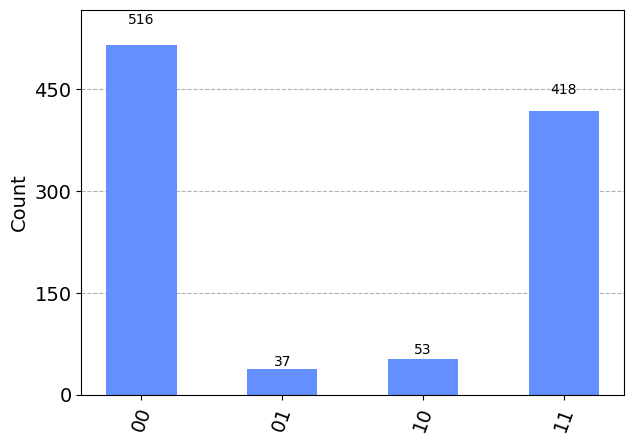

In [30]:
plot_histogram(counts)